In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

### Reading Data File

In [2]:
data = pd.read_csv("MLF_GP1_CreditScore.csv")

In [3]:
data.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


### Data Preprocessing and Cleaning for Analysis

In [4]:
data.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


##### Checking Missing Values in Data

In [5]:
miss_vals = data.isnull().sum()
print(miss_vals)

Sales/Revenues              0
Gross Margin                0
EBITDA                      0
EBITDA Margin               0
Net Income Before Extras    0
Total Debt                  0
Net Debt                    0
LT Debt                     0
ST Debt                     0
Cash                        0
Free Cash Flow              0
Total Debt/EBITDA           0
Net Debt/EBITDA             0
Total MV                    0
Total Debt/MV               0
Net Debt/MV                 0
CFO/Debt                    0
CFO                         0
Interest Coverage           0
Total Liquidity             0
Current Liquidity           0
Current Liabilities         0
EPS Before Extras           0
PE                          0
ROA                         0
ROE                         0
InvGrd                      0
Rating                      0
dtype: int64


##### Dataset has no missing values

### Understanding rating distribution of each category of investment grade

In [6]:
data.Rating.value_counts(normalize=True)

Baa2    0.191765
Baa3    0.136471
Baa1    0.105294
Aa3     0.102353
A2      0.091765
Ba2     0.073529
A1      0.071765
Ba3     0.063529
B1      0.040588
Aa2     0.038235
B2      0.028235
B3      0.021765
A3      0.018235
Ba1     0.010000
Caa1    0.005294
Aaa     0.001176
Name: Rating, dtype: float64

In [7]:
iv_grade_count = data['Rating'].value_counts()

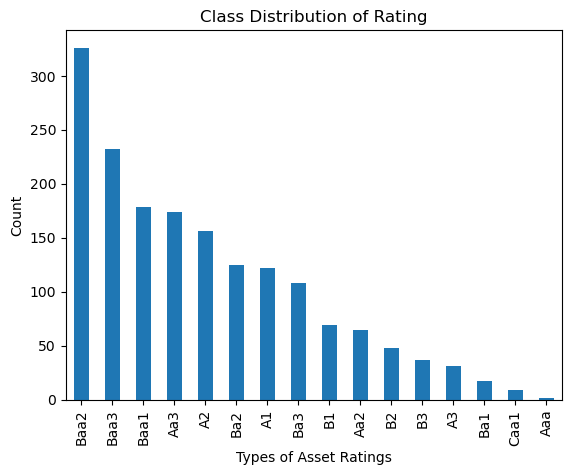

In [8]:
iv_grade_count.plot(kind='bar', rot=90)
plt.title('Class Distribution of Rating')
plt.xlabel('Types of Asset Ratings')
plt.ylabel('Count') 
plt.show()

##### Checking class distribution of 'InvGrd'  feature

Text(0, 0.5, 'Count')

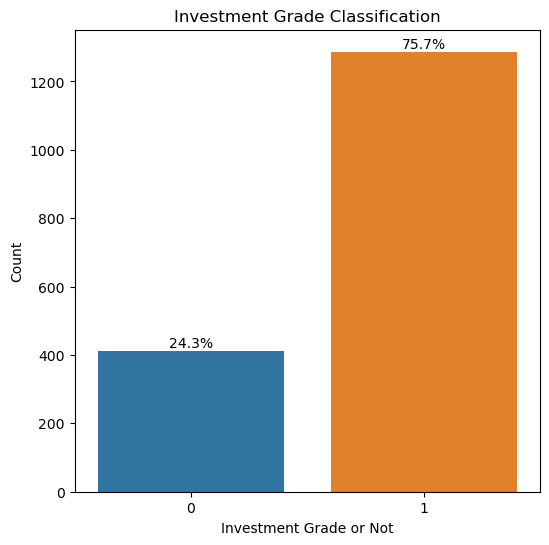

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
sns.countplot(x="InvGrd", data=data, ax=axes)
total_count = len(data["InvGrd"])
for p in axes.patches:
    percentage = p.get_height() / total_count * 100
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')
    
plt.title('Investment Grade Classification')
plt.xlabel('Investment Grade or Not')
plt.ylabel('Count')


#### Feature Selection for Model Building

The purpose for performing feature engineering in this dataset is to understand which all features are required for model building. There can be multiple features that can be highly correlated with the response variable "InvGrd" and thus can cause poor model building. It is important for reducing the complexity of the model and produce better results.

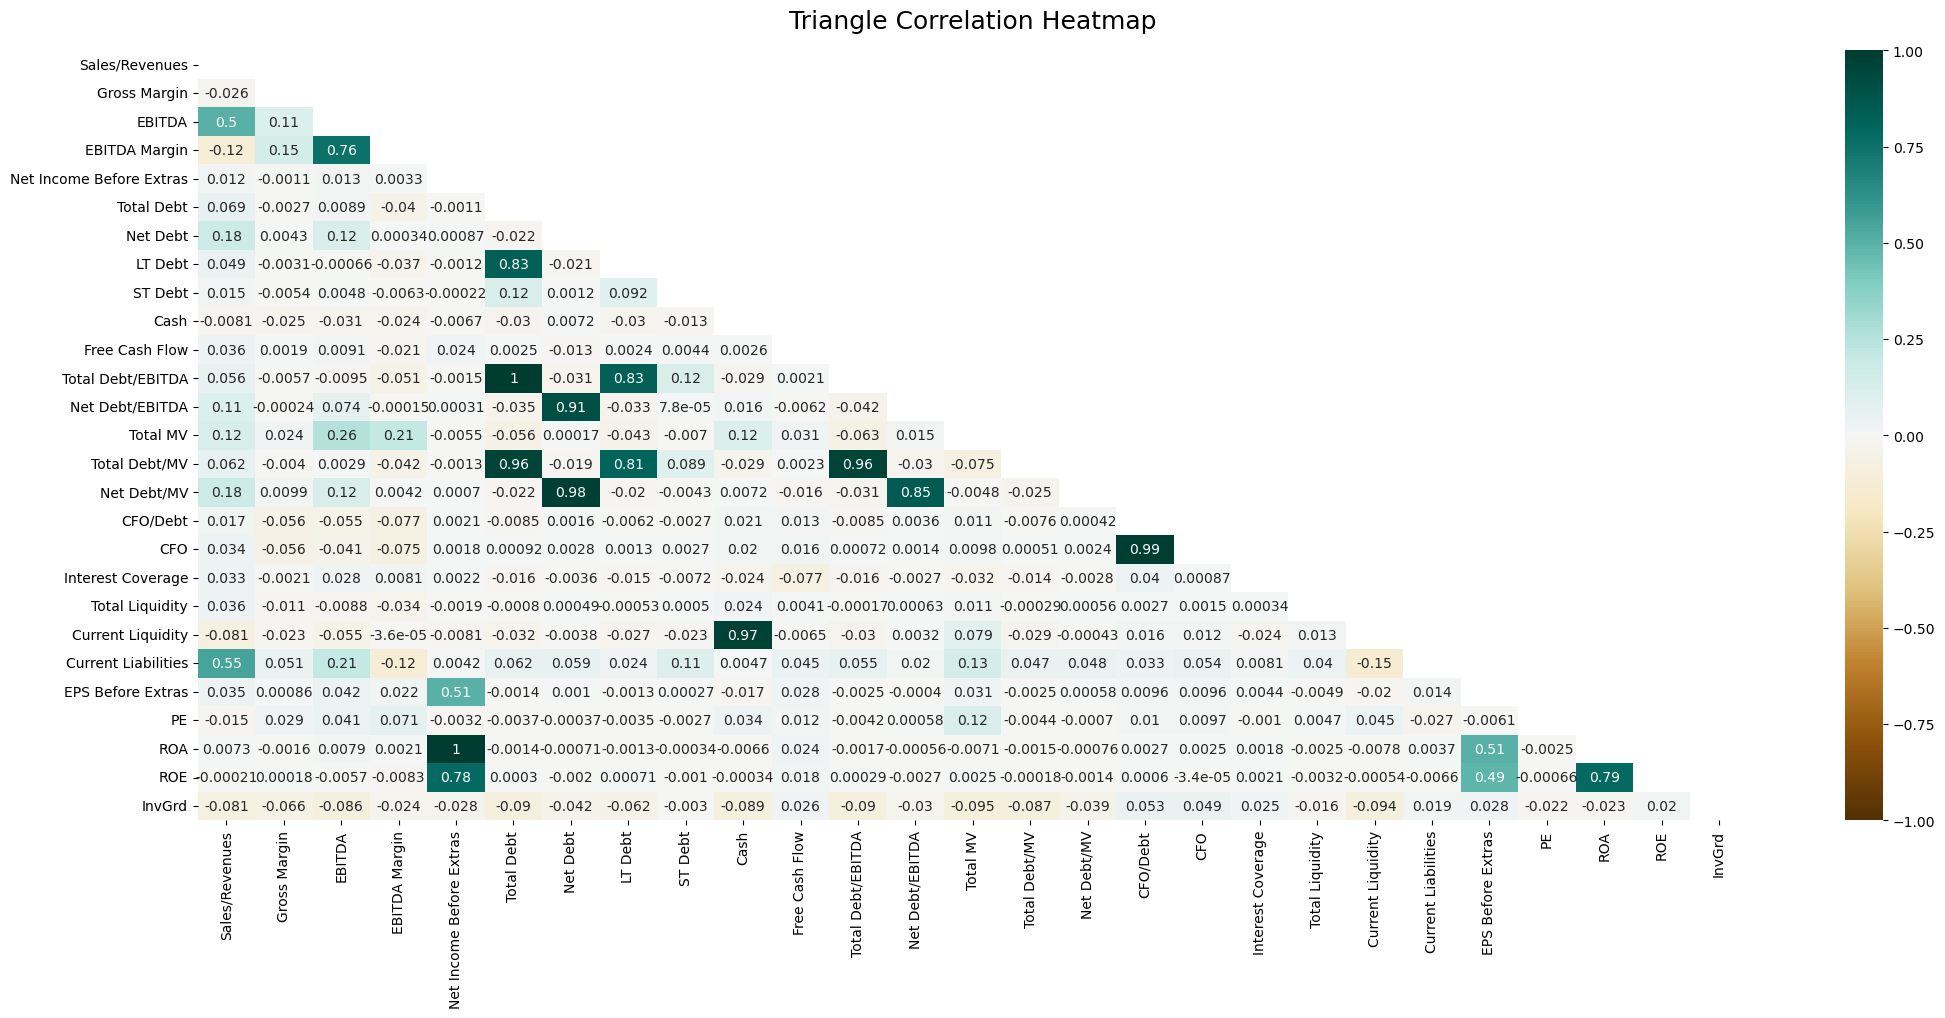

In [10]:
# Correlation Matrix Plot
numeric_columns = data.drop(columns=['Rating'])
plt.figure(figsize=(25, 10))
mask=np.triu(np.ones_like(numeric_columns.corr(), dtype=np.bool_))
heatmap = sns.heatmap(numeric_columns.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Calculating VIF values for predictor features
VIF can be calculated during the feature selection process to identify and remove highly correlated predictor variables from the model. Let us calculate the Variance Inflaction Factor values for all the features with the target variable (InvGrd) and proceed accordingly. This metric is being considered for the fact that there are total of 27 predictor features in the data and a correlation plot cannot clearly show the important features for model building. 

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = data.drop(columns=['Rating','InvGrd'])
target = data['InvGrd']

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Print the VIF values
print(vif)

                    Features          VIF
0             Sales/Revenues     8.187854
1               Gross Margin     1.047831
2                     EBITDA    16.987291
3              EBITDA Margin    11.701079
4   Net Income Before Extras   191.009657
5                 Total Debt  1258.172087
6                   Net Debt    50.653675
7                    LT Debt     3.301157
8                    ST Debt     1.048742
9                       Cash    35.607711
10            Free Cash Flow     1.011550
11         Total Debt/EBITDA  1169.987264
12           Net Debt/EBITDA     7.577840
13                  Total MV     1.200012
14             Total Debt/MV    16.000803
15               Net Debt/MV    31.380895
16                  CFO/Debt    61.877889
17                       CFO    61.817465
18         Interest Coverage     1.112336
19           Total Liquidity     1.003999
20         Current Liquidity    35.585353
21       Current Liabilities     2.588955
22         EPS Before Extras     1

#### Problem of Multicollinearity
Multicollinearity is a common problem in statistical analysis and regression modeling, where two or more predictor variables in a model are highly correlated with each other. 
VIF < 5 is considered to have low multicollinearity. VIF values between 5 and 10 are condsidered to have moderate multicollinearity. VIF values greater than 10 are considered to have high multicollinearity and thus should be removed before regression model building.

### Let us drop high VIF values features and recheck the VIF values
The multicollinearity among the predictor features is the primary reason to drop some features. But the given dataset clearly shows features that lead to the same output and hence it is appropriate to remove such features before model building. Such examples can be Total Debt/MV and Net Debt/MV where both features are correlated with each other and removing one of them decreases the multicollinearity. Another such example can be Total Debt/EBITDA and Net Debt/EBITDA. Removing one can decrease the multicollinearity in the data. Similarly other features are removed.

In [12]:
features = data.drop(columns=['Total Debt', 'Rating','InvGrd','Net Debt/MV','Net Income Before Extras','Current Liquidity','EBITDA','Total Debt/EBITDA','CFO/Debt'])
target = data['InvGrd']

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Features'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Print the VIF values
print(vif)

               Features       VIF
0        Sales/Revenues  1.631376
1          Gross Margin  1.039245
2         EBITDA Margin  1.120290
3              Net Debt  5.893256
4               LT Debt  2.867063
5               ST Debt  1.026439
6                  Cash  1.032585
7        Free Cash Flow  1.010464
8       Net Debt/EBITDA  5.783888
9              Total MV  1.176118
10        Total Debt/MV  2.879268
11                  CFO  1.011010
12    Interest Coverage  1.010818
13      Total Liquidity  1.002538
14  Current Liabilities  1.604751
15    EPS Before Extras  1.388535
16                   PE  1.022058
17                  ROA  2.787012
18                  ROE  2.715087


### Creating a new dataset with selected features

In [13]:
new_data = data.drop(columns=['Total Debt', 'Rating','Net Debt/MV','Net Income Before Extras','Current Liquidity','EBITDA','Total Debt/EBITDA','CFO/Debt'])

### Model Building using Linear Regerssion with Ridge (or L1) and Lasso (or L2) 

In [14]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [15]:
X = new_data.drop('InvGrd', axis=1)
y = new_data['InvGrd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge (L2) and Lasso (L1) regression models
lr_ridge_model = Ridge(alpha=1.0)  # You can adjust the value of alpha for Ridge regularization
lr_lasso_model = Lasso(alpha=1.0)  # You can adjust the value of alpha for Lasso regularization

# Fit the Ridge and Lasso models on the training data
lr_ridge_model.fit(X_train, y_train)
lr_lasso_model.fit(X_train, y_train)

# Predict the target variable on the testing data
ridge_pred = lr_ridge_model.predict(X_test)
lasso_pred = lr_lasso_model.predict(X_test)

# Convert the predicted values to binary classes (0 or 1) based on a threshold (e.g., 0.5)
ridge_pred_classes = [1 if x >= 0.5 else 0 for x in ridge_pred]
lasso_pred_classes = [1 if x >= 0.5 else 0 for x in lasso_pred]

# Accuracy score for Ridge and Lasso models
ridge_accuracy = accuracy_score(y_test, ridge_pred_classes)
lasso_accuracy = accuracy_score(y_test, lasso_pred_classes)

# Predict the target variable on the testing data
ridge_pred = lr_ridge_model.predict(X_test)
lasso_pred = lr_lasso_model.predict(X_test)

# Mean Squared Error (MSE) for Ridge and Lasso models
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Root Mean Squared Error (RMSE) for Ridge and Lasso models
ridge_rmse = np.sqrt(ridge_mse)
lasso_rmse = np.sqrt(lasso_mse)

# R-squared (R2) score for Ridge and Lasso models
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Ridge MSE:", ridge_mse)
print("Ridge RMSE:", ridge_rmse)
print("Ridge R2 Score:", ridge_r2)
print("Ridge Accuracy:", ridge_accuracy)

print("Lasso MSE:", lasso_mse)
print("Lasso RMSE:", lasso_rmse)
print("Lasso R2 Score:", lasso_r2)
print("Lasso Accuracy:", lasso_accuracy)

Ridge MSE: 0.1782506714291364
Ridge RMSE: 0.4221974318125779
Ridge R2 Score: 0.04177001408072123
Ridge Accuracy: 0.7647058823529411
Lasso MSE: 0.1860472534602076
Lasso RMSE: 0.4313319527466144
Lasso R2 Score: -0.00014241536458348136
Lasso Accuracy: 0.7529411764705882


#### Model Building using Linear Regerssion with Ridge (or L1) and Lasso (or L2) Discussion:
1. Ridge MSE (Mean Squared Error): It is a measure of the average squared difference between the predicted and actual target values for the Ridge regression model. In this case, the MSE for Ridge is 0.1782506714291364, which indicates the average squared prediction error is approximately 0.178.
2. Ridge RMSE (Root Mean Squared Error): It is the square root of MSE and provides a measure of the average magnitude of the prediction errors in the original units of the target variable for the Ridge regression model. In this case, the RMSE for Ridge is 0.4221974318125779, which indicates the average magnitude of prediction errors is approximately 0.422.
3. Ridge R2 Score: It shows the proportion of variance in the target variable explained by Ridge regression. A higher R2 score (e.g., 0.041) indicates better model performance.
4. Lasso MSE (Mean Squared Error): It measures the average squared difference between predicted and actual target values for Lasso regression. A lower MSE (e.g., 0.186) indicates smaller prediction errors.
5. Lasso RMSE (Root Mean Squared Error): It is the square root of MSE and represents the average magnitude of prediction errors in the original units of the target variable for Lasso regression. A smaller RMSE (e.g., 0.431) indicates smaller prediction errors.
6. Lasso R2 Score: It shows the proportion of variance in the target variable explained by Lasso regression. A lower R2 score (e.g., -0.0001) indicates poor model performance.

### Model Building using Logistic Regerssion with Ridge (or L1) and Lasso (or L2) 

In [27]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

X1 = data.drop(columns=['InvGrd','Rating'], axis=1)
y1 = data['InvGrd']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

ridge_logreg = LogisticRegression(penalty='l2', solver='liblinear')
lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear')

ridge_logreg.fit(X1_train, y1_train)
lasso_logreg.fit(X1_train, y1_train)

ridge_y_pred = ridge_logreg.predict(X1_test)
lasso_y_pred = lasso_logreg.predict(X1_test)

ridge_report = classification_report(y1_test, ridge_y_pred)
print("Ridge Classification Report:\n", ridge_report)

# Calculate performance metrics for Lasso model
lasso_report = classification_report(y1_test, lasso_y_pred)
print("Lasso Classification Report:\n", lasso_report)

Ridge Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.07      0.13        84
           1       0.76      0.99      0.86       256

    accuracy                           0.76       340
   macro avg       0.72      0.53      0.50       340
weighted avg       0.74      0.76      0.68       340

Lasso Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.06      0.11        84
           1       0.76      0.99      0.86       256

    accuracy                           0.76       340
   macro avg       0.74      0.53      0.49       340
weighted avg       0.75      0.76      0.68       340



#### Model Building using Logistic Regerssion with Ridge (or L1) and Lasso (or L2) Discussion:
Since logistic regression is a classification problem, MSE and RMSE may not be appropriate performance metrics. Hence, there are other metrics such as F1-score, precision and recall. 

The performance of a Ridge classifier model is described as follows: 

1. Precision, which measures the accuracy of positive predictions, is 67% for class 0 and 76% for class 1. This means that the model correctly predicted 67% of the positive samples for class 0 and 76% of the positive samples for class 1.

2. Recall, also known as sensitivity or true positive rate, is 7% for class 0 and 99% for class 1. This indicates that the model was able to capture only 7% of the actual positives for class 0, but it captured 99% of the actual positives for class 1.

3. F1-score, which combines precision and recall into a balanced measure, is 0.13 for class 0 and 0.86 for class 1. This suggests that the model's predictions for class 1 are much better than for class 0.

4. Support refers to the number of samples in each class, with 84 samples for class 0 and 256 samples for class 1, providing insights into the distribution of samples in the dataset.

5. The overall accuracy of the model is 0.76, which means it correctly predicted 76% of the samples.

The performance of a Lasso classifier model is described as follows:

1. Precision, which measures the accuracy of positive predictions, is 71% for class 0 and 76% for class 1. This indicates that the model accurately predicted positive samples for class 0 in 71% of the cases and for class 1 in 76% of the cases.

2. Recall, also known as sensitivity or true positive rate, is 6% for class 0 and 99% for class 1. This suggests that the model was able to capture only a small percentage of actual positives for class 0, but it performed very well in capturing actual positives for class 1, with a recall rate of 99%.

3. F1-score, which combines precision and recall, is 0.11 for class 0 and 0.86 for class 1. This indicates that the model's predictions for class 1 are significantly better compared to class 0, showing its effectiveness in classifying samples of class 1.

4. Support represents the number of samples in each class, with 84 samples for class 0 and 256 samples for class 1, providing insights into the distribution of samples across different classes.

5. The overall accuracy of the model is 0.76, indicating that it correctly predicted 76% of the samples. This suggests a reasonable level of accuracy in its predictions.

### A Neural Networks based approach to classify the firm’s rating

In [28]:
import tensorflow as tf
import keras as ke
# Encode the target variable using one-hot encoding
y = tf.keras.utils.to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score: {:.2f}%".format(accuracy*100))


Metal device set to: Apple M1
Epoch 1/50


2023-04-19 00:39:10.144877: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


43/43 [==============================] - 1s 13ms/step - loss: 0.6439 - accuracy: 0.7235 - val_loss: 0.5917 - val_accuracy: 0.7618
Epoch 2/50
43/43 [==============================] - 0s 11ms/step - loss: 0.5590 - accuracy: 0.7721 - val_loss: 0.5549 - val_accuracy: 0.7706
Epoch 3/50
43/43 [==============================] - 0s 9ms/step - loss: 0.5199 - accuracy: 0.7787 - val_loss: 0.5351 - val_accuracy: 0.7676
Epoch 4/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4981 - accuracy: 0.7816 - val_loss: 0.5270 - val_accuracy: 0.7735
Epoch 5/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4833 - accuracy: 0.7831 - val_loss: 0.5169 - val_accuracy: 0.7765
Epoch 6/50
43/43 [==============================] - 0s 10ms/step - loss: 0.4717 - accuracy: 0.7890 - val_loss: 0.5130 - val_accuracy: 0.7824
Epoch 7/50
43/43 [==============================] - 0s 9ms/step - loss: 0.4619 - accuracy: 0.7890 - val_loss: 0.5104 - val_accuracy: 0.7853
Epoch 8/50
43/43 [========

#### Model building using Keras and Tensorflow discussion:

1. The output you provided is from training a neural network model using Keras with TensorFlow as the backend. The model was trained for 50 epochs, and the training and validation accuracy and loss were monitored during training.

2. In terms of accuracy, the model started with a training accuracy of 0.7235 and a validation accuracy of 0.7618 in the first epoch. This means that the model correctly classified 72.35% of the training data and 76.18% of the validation data.

3. As the training continued, the accuracy improved, and by the end of the training, the model achieved a training accuracy of 0.8360 and a validation accuracy of 0.7882. This means that the model correctly classified 83.60% of the training data and 78.82% of the validation data.

4. Overall, the training accuracy continued to improve with each epoch, while the validation accuracy jumped between  0.77-0.80. This could suggest that the model was starting to overfit the training data, as it was performing well on the training set but not improving as much on the validation set.


# References
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://keras.io/api/
4. https://matplotlib.org/
5. https://seaborn.pydata.org/